* created by nov05 on 2024-12-01  
* local conda env `awsmle_py310`  

In [2]:
%pwd

'd:\\github\\udacity-CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter'

In [30]:
## get an example image
import os
import requests
url = r"https://sagemaker-us-east-1-061096721307.s3.us-east-1.amazonaws.com/p3-dog-breed-classification/dogImages/train/081.Greyhound/Greyhound_05496.jpg"
img_path = r"data/dogs/Greyhound_05496.jpg"
def download():
    os.makedirs(os.path.dirname(img_path), exist_ok=True)
    response = requests.get(url)
    if response.status_code==200:
        with open(img_path, 'wb') as f:
            f.write(response.content)
    else:
        print('⚠️', response.status_code)
def display():
    import matplotlib.pyplot as plt
    from matplotlib.image import imread
    img = imread(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

(283, 500, 3)


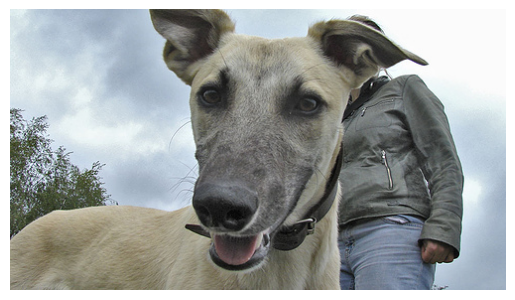

In [31]:
download()
display()

(291, 325, 3)


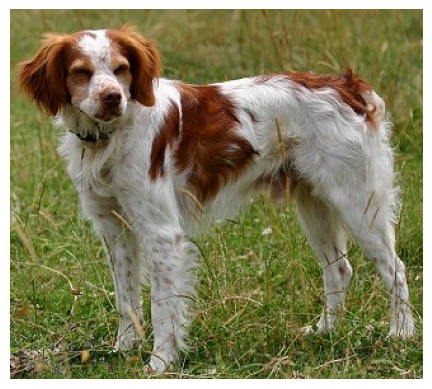

In [32]:
url = r"https://sagemaker-us-east-1-061096721307.s3.us-east-1.amazonaws.com/p3-dog-breed-classification/dogImages/train/037.Brittany/Brittany_02587.jpg"
img_path = r"data/dogs/Brittany_02587.jpg"
download()
display()

In [ ]:
## reset the session after updating credentials
import boto3 # type: ignore
boto3.DEFAULT_SESSION = None

import sagemaker # type: ignore
from sagemaker import get_execution_role # type: ignore
role_arn = get_execution_role()  ## get role ARN
if 'AmazonSageMaker-ExecutionRole' not in role_arn:
    ## your own role here
    role_arn = "arn:aws:iam::061096721307:role/service-role/AmazonSageMaker-ExecutionRole-20241128T055392"
print("Role ARN:", role_arn) ## If local, Role ARN: arn:aws:iam::807711953667:role/voclabs
session = sagemaker.Session()
region = session.boto_region_name
bucket = session.default_bucket()
print("AWS Region: {}".format(region))
print("Default Bucket: {}".format(bucket))
print("Role Arn: {}".format(role_arn))

In [6]:
s3 = boto3.client('s3')
bucket_name = 'p3-dog-breed-classification'
prefix = 'dogImages/train/'  # Optional: specify a prefix to narrow the search
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix, Delimiter='/')
folders = response.get('CommonPrefixes', [])
print(folders[0])
print(f"👉 Number of classes: {len(folders)}")

{'Prefix': 'dogImages/train/001.Affenpinscher/'}
👉 Number of classes: 133
